## Ali Abdullah Ahmad
## CWID 20031246
## HW06 C45 & C50

In [227]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier , plot_tree


<h1 style="text-align: center;">6.2 C5.0</h1>

In [238]:
# Load the dataset from the specified file path
df = pd.read_csv('D:/Stevens GIT/Stevens_IT-MS_in_CS/SPRING_25/CS513_Knowledge_Discovery&Data_Mining/HW/breast-cancer-wisconsin.csv')

# Display the first few rows of the dataset
df.head()

# Display the data types of each column in the dataset
df.dtypes

# Count the occurrences of each unique value in the "F6" column
df["F6"].value_counts()

# Display information about the dataset, including column names, non-null counts, and data types
df.info()

# Replace '?' with NaN (missing values) for proper handling of missing data
df.replace('?', np.NAN, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sample  699 non-null    int64 
 1   F1      699 non-null    int64 
 2   F2      699 non-null    int64 
 3   F3      699 non-null    int64 
 4   F4      699 non-null    int64 
 5   F5      699 non-null    int64 
 6   F6      699 non-null    object
 7   F7      699 non-null    int64 
 8   F8      699 non-null    int64 
 9   F9      699 non-null    int64 
 10  Class   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [239]:
# Convert the 'F6' column to float type for consistency in data types
df['F6'] = df['F6'].astype('float')

# Display information about the dataset to verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sample  699 non-null    int64  
 1   F1      699 non-null    int64  
 2   F2      699 non-null    int64  
 3   F3      699 non-null    int64  
 4   F4      699 non-null    int64  
 5   F5      699 non-null    int64  
 6   F6      683 non-null    float64
 7   F7      699 non-null    int64  
 8   F8      699 non-null    int64  
 9   F9      699 non-null    int64  
 10  Class   699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [240]:
# Fill missing values in the 'F6' column with the mean of the column
df["F6"] = df['F6'].fillna(df['F6'].mean())

# Convert the 'F6' column to integer type for consistency
df['F6'] = df['F6'].astype('int64')

In [243]:
X = df.drop(columns=["Sample",'Class'])
y = df['Class']

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(489, 9)
(210, 9)
(489,)
(210,)


In [244]:
### C5.0 Equivalent: Decision Tree Classifier
# Initialize the Decision Tree Classifier with entropy criterion, maximum depth of 3, and maximum of 5 leaf nodes
model = DecisionTreeClassifier(criterion="entropy", max_depth=3, max_leaf_nodes=5)

# Fit the model using the training data (X_train as features and y_train as target variable)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=5)

In [233]:
# Predictions and Evaluation (Decision Tree)
y_pred_dt = model.predict(X_test)
print("\nDecision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Classifier Performance:
Accuracy: 0.9476190476190476
Confusion Matrix:
 [[141   2]
 [  9  58]]
Classification Report:
               precision    recall  f1-score   support

           2       0.94      0.99      0.96       143
           4       0.97      0.87      0.91        67

    accuracy                           0.95       210
   macro avg       0.95      0.93      0.94       210
weighted avg       0.95      0.95      0.95       210



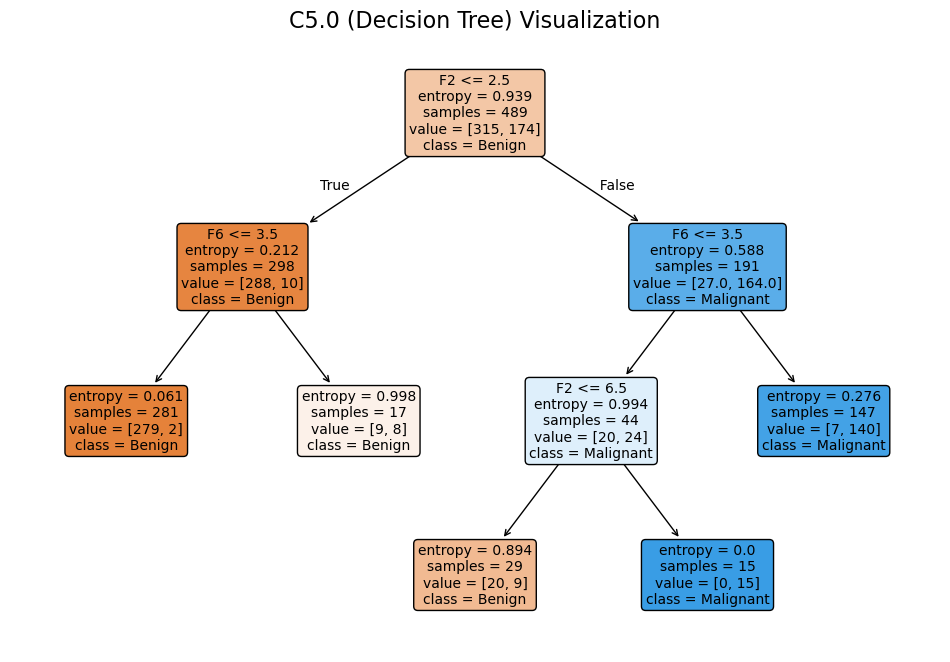

In [234]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(
    model, 
    filled=True, 
    feature_names=X.columns, 
    class_names=['Benign', 'Malignant'], 
    rounded=True, 
    fontsize=10
)
plt.title("C5.0 (Decision Tree) Visualization", fontsize=16)
plt.show()

<h1 style="text-align: center;">6.3 Random Forest</h1>

In [235]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

model_rf = RandomForestClassifier(criterion='entropy')
model_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [236]:
y_pred_rf = model_rf.predict(X_test)
print("\nRandom Forest Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier Performance:
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[140   3]
 [  4  63]]
Classification Report:
               precision    recall  f1-score   support

           2       0.97      0.98      0.98       143
           4       0.95      0.94      0.95        67

    accuracy                           0.97       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



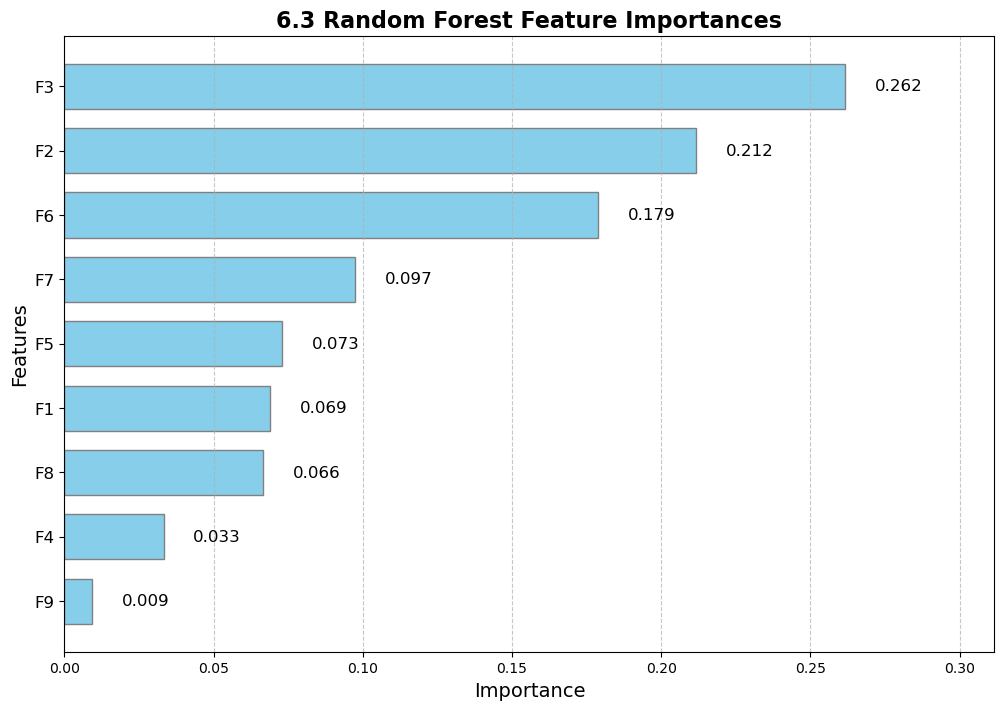

  Feature  Importance
0      F3    0.261645
1      F2    0.211650
2      F6    0.178707
3      F7    0.097344
4      F5    0.072762
5      F1    0.068901
6      F8    0.066472
7      F4    0.033213
8      F9    0.009305


In [237]:
# Identify important features
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title('6.3 Random Forest Feature Importances', fontsize=16, weight='bold')
bars = plt.barh(range(X.shape[1]), importances[indices], align="center", color='skyblue', edgecolor='grey', height=0.7)  # Horizontal bars
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices], fontsize=12)  # Corrected to use list comprehension
plt.xlabel('Importance', fontsize=14)  # Label for the x-axis
plt.ylabel('Features', fontsize=14)  # Label for the y-axis
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.3f}', va='center', ha='left', fontsize=12, color='black')
plt.xlim(0, max(importances) + 0.05)  # Adjusted x-axis limit dynamically
plt.show()

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': [X.columns[i] for i in indices],
    'Importance': importances[indices]
})
print(feature_importance_df)